In [1]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
path = '../epitomes'
pattern = '\d+'
chars = []
tokens = []
epitome_numbers = []

for file in os.listdir(path):
    with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
        epitome_numbers.append(int(re.search(pattern, file).group()))
        text = f.read()
        chars.append(len(text))
        text_tokens = text.split()
        tokens.append(len(text_tokens))

In [3]:
total_chars = sum(chars)
avg_chars = total_chars/len(chars)
total_tokens = sum(tokens)
avg_tokens = total_tokens/len(tokens)

# window_size = 10
# i = 0
# moving_avg_tokens = []

# while i < len(tokens) - window_size + 1:
    
#     window = tokens[i: i + window_size]
#     window_avg = sum(window)/window_size
#     moving_avg_tokens.append(window_avg)
#     i += 1

print('CHARACTERS')
print(f'Total characters in BoB: {total_chars:.2f}')
print(f'Mean characters per epitome: {avg_chars:.2f}')
print('TOKENS')
print(f'Total tokens in BoB: {total_tokens}')
print(f'Mean tokens per epitome: {avg_tokens:.2f}')

CHARACTERS
Total characters in BoB: 1680517.00
Mean characters per epitome: 1530.53
TOKENS
Total tokens in BoB: 231182
Mean tokens per epitome: 210.55


In [4]:
window_size = 50
tokens_df = pd.DataFrame(tokens)
rolling_tokens_df = tokens_df.rolling(window_size, min_periods=1).mean()

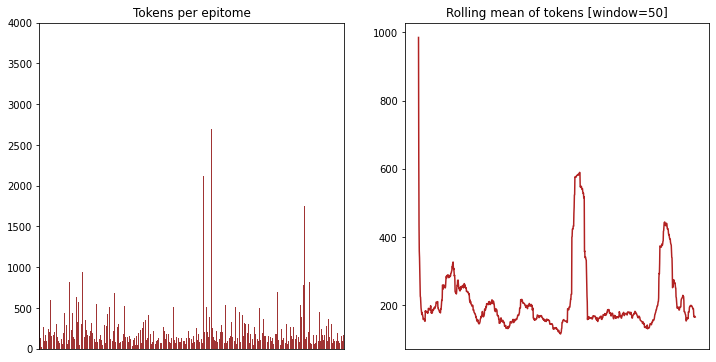

In [15]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
sns.barplot(x=list(range(len(tokens))), y=tokens, ax=axes[0], color='firebrick')
axes[0].set_ylim(0, 4000)
axes[0].set_xticks([])
axes[0].set_title('Tokens per epitome')

sns.lineplot(rolling_tokens_df, ax=axes[1], legend=False, palette=['firebrick'])
axes[1].set_xticks([])
axes[1].set_title(f'Rolling mean of tokens [window={window_size}]');